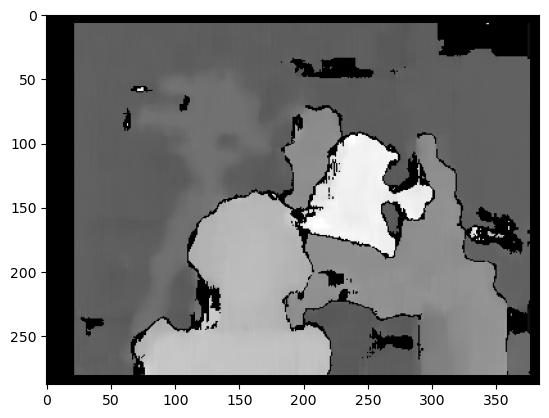

In [59]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 #this for call the image left and right 
imgL = cv.imread(r"C:\Users\User\Downloads\tsukuba_l.png", cv.IMREAD_GRAYSCALE)
imgR = cv.imread(r"C:\Users\User\Downloads\tsukuba_r.png", cv.IMREAD_GRAYSCALE)



# Create StereoBM object with parameters
stereo = cv.StereoBM.create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

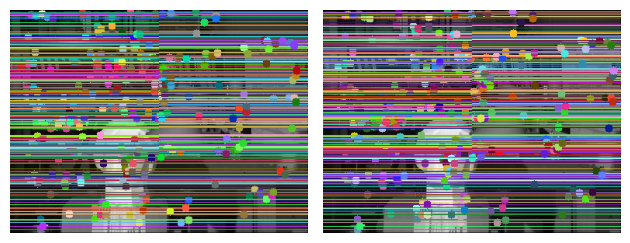

(None, None)

In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load stereo images in grayscale
img1 = cv.imread(r"C:\Users\User\Downloads\tsukuba_r.png", cv.IMREAD_GRAYSCALE)
img2 = cv.imread(r"C:\Users\User\Downloads\tsukuba_l.png", cv.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors using SIFT
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match descriptors using FLANN with Lowe's ratio test
flann = cv.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
matches = flann.knnMatch(des1, des2, k=2)

pts1, pts2 = [], []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1, pts2 = np.int32(pts1), np.int32(pts2)

# Compute the fundamental matrix and get inlier points
F, mask = cv.findFundamentalMat(pts1, pts2, cv.FM_LMEDS)
pts1, pts2 = pts1[mask.ravel() == 1], pts2[mask.ravel() == 1]

# Function to draw epipolar lines
def draw_epilines(img1, img2, lines, pts1, pts2):
    img1, img2 = cv.cvtColor(img1, cv.COLOR_GRAY2BGR), cv.cvtColor(img2, cv.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = int(0), int(-r[2]/r[1])
        x1, y1 = int(img1.shape[1]), int(-(r[2] + r[0]*img1.shape[1])/r[1])
        img1 = cv.line(img1, (x0, y0), (x1, y1), color, 1)
        img1 = cv.circle(img1, tuple(pt1), 5, color, -1)
        img2 = cv.circle(img2, tuple(pt2), 5, color, -1)
    return img1, img2

# Compute and draw epilines on both images
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F).reshape(-1, 3)
img1_lines, _ = draw_epilines(img1, img2, lines1, pts1, pts2)

lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F).reshape(-1, 3)
img2_lines, _ = draw_epilines(img2, img1, lines2, pts2, pts1)

# Show the results
plt.subplot(121), plt.imshow(img1_lines), plt.axis('off')
plt.subplot(122), plt.imshow(img2_lines), plt.axis('off')
plt.tight_layout(), plt.show()

In [ ]:
#
#SIFT detects keypoints:unique,distinctive points in the image(like corners).
#It also computes descriptors:a vector that describes the region around each keypoint.

# Match Descriptors using FLANN is a fast matcher that finds the best matches between descriptors.knnMatch(..., k=2) finds the two closest matches for each descriptor (for ratio test).
#Lowe’s Ratio Test (Filter Good Matchethe ratio test helps remove bad matches. Only keep a match if the best match is much better than the second-best. This gives us good matching points pts1 and pts2.)

#Estimate the Fundamental Matrix ( F describes the geometric relationship between the two images.It allows you to compute where a point in one image lies in the other image (the epipolar line).We use cv.FM_LMEDS which is a robust method that handles outliers.The mask tells us which matches are inliers (i.e., consistent with F), and we keep those.)

#Define Function to Draw Epipolar Lines (The epipolar line on one image.The matching feature points on both images.It uses random colors for visualization.It uses line equations (ax + by + c = 0) to draw the lines.)

#Compute and Draw Epipolar Lines (computes the epipolar line in img1 for points in img2. doing the same again but reversed to draw epipolar lines in img2 for points in img1.)

#Display the Result ( Left image with epipolar lines for right points. Right image with epipolar lines for left points.)

#it is useful for ( Epipolar geometry is the core of stereo vision.)
#It helps us ( find corresponding points in two images.)
#It's essential for (3D reconstruction, depth estimation, and more.)